In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
data = pd.read_csv('/content/drive/MyDrive/ST4035_DataScience/Group Project/v4_Latest_Data_Science_Salaries.csv')
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,AI Scientist,Full-Time,Senior,Expert,60000,Euro,Germany,64781,Germany,Large,2023
1,Data Engineer,Full-Time,Mid,Intermediate,160000,United States Dollar,United States,160000,United States,Medium,2023
2,Data Engineer,Full-Time,Mid,Intermediate,140000,United States Dollar,United States,140000,United States,Medium,2023
3,Data Engineer,Full-Time,Mid,Intermediate,139152,United States Dollar,United States,139152,United States,Large,2023
4,Data Engineer,Full-Time,Mid,Intermediate,82452,United States Dollar,United States,82452,United States,Large,2023


There isn't a globally standardized range for categorizing salaries into specific ranges, as salary levels can vary significantly based on factors such as country, industry, job role, and cost of living. What might be considered a high salary in one region could be quite different in another due to differences in economic conditions and purchasing power.

However, some organizations and agencies do provide general guidelines or salary benchmarks based on global or regional data. For example, the World Bank might provide income categories based on countries' gross national income (GNI) per capita, but these categories are often used for economic classification rather than precise salary ranges.

If you're looking for a standardized approach, you might consider using percentiles or quartiles based on your specific dataset. This way, you can categorize salaries relative to the distribution within your data, which could offer more meaningful insights for your analysis. Alternatively, you could consult salary surveys or reports specific to your industry or region to get a sense of typical salary ranges for different roles and experience levels.


In [ ]:
data.isnull().sum()


Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [34]:
df = data.copy()

In [35]:
# Define bin edges and category labels
bin_edges = [0, 80000, 120000, 160000, 200000, float('inf')]
category_labels = ['Less than $80000', '$80000 - $120000', '$120000 - $160000', '$160000 - $200000', 'More than $200000']

# Create a new categorical variable based on Salary in USD
salary_categories = pd.cut(df["Salary in USD"], bins=bin_edges, labels=category_labels, right=False)

# Convert to an ordinal categorical data type
salary_categories = pd.Categorical(salary_categories, categories=category_labels, ordered=True)

# Add the ordinal categorical variable to the DataFrame
df["Salary Category"] = salary_categories

# Get frequency counts of each category
category_counts = df["Salary Category"].value_counts()

# Display the frequency counts
print(category_counts)

# Display the first few rows of the DataFrame with the new category column
df.head()


$120000 - $160000    872
$80000 - $120000     748
More than $200000    725
Less than $80000     702
$160000 - $200000    636
Name: Salary Category, dtype: int64


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year,Salary Category
0,AI Scientist,Full-Time,Senior,Expert,60000,Euro,Germany,64781,Germany,Large,2023,Less than $80000
1,Data Engineer,Full-Time,Mid,Intermediate,160000,United States Dollar,United States,160000,United States,Medium,2023,$160000 - $200000
2,Data Engineer,Full-Time,Mid,Intermediate,140000,United States Dollar,United States,140000,United States,Medium,2023,$120000 - $160000
3,Data Engineer,Full-Time,Mid,Intermediate,139152,United States Dollar,United States,139152,United States,Large,2023,$120000 - $160000
4,Data Engineer,Full-Time,Mid,Intermediate,82452,United States Dollar,United States,82452,United States,Large,2023,$80000 - $120000


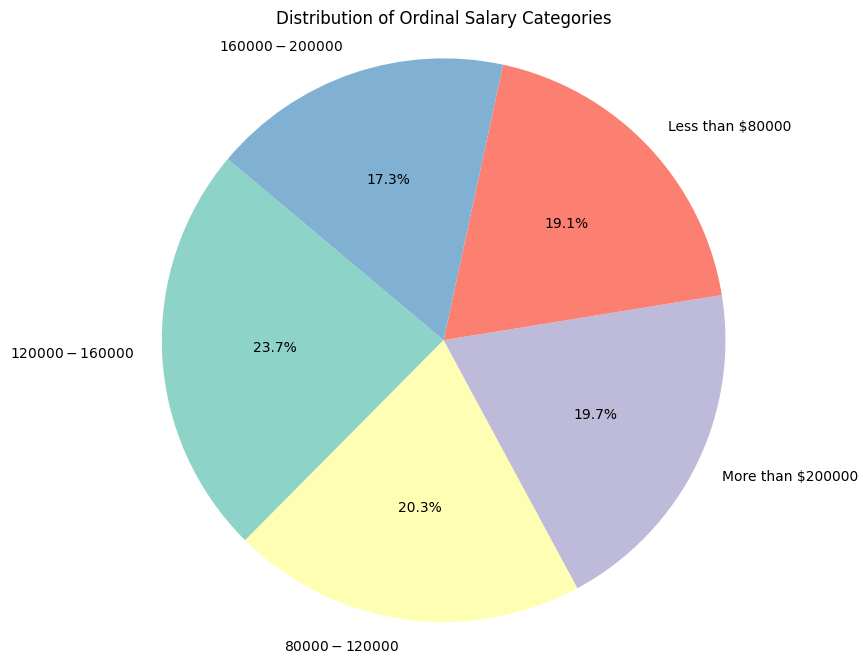

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year,Salary Category
0,AI Scientist,Full-Time,Senior,Expert,60000,Euro,Germany,64781,Germany,Large,2023,Less than $80000
1,Data Engineer,Full-Time,Mid,Intermediate,160000,United States Dollar,United States,160000,United States,Medium,2023,$160000 - $200000
2,Data Engineer,Full-Time,Mid,Intermediate,140000,United States Dollar,United States,140000,United States,Medium,2023,$120000 - $160000
3,Data Engineer,Full-Time,Mid,Intermediate,139152,United States Dollar,United States,139152,United States,Large,2023,$120000 - $160000
4,Data Engineer,Full-Time,Mid,Intermediate,82452,United States Dollar,United States,82452,United States,Large,2023,$80000 - $120000


In [36]:
# Create a pie chart to visualize the distribution of ordinal salary categories
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set3", len(category_counts)))
plt.title("Distribution of Ordinal Salary Categories")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Display the first few rows of the DataFrame with the new category column
df.head()

In [38]:
df['Salary Category']

0        Less than $80000
1       $160000 - $200000
2       $120000 - $160000
3       $120000 - $160000
4        $80000 - $120000
              ...        
3678    More than $200000
3679    $120000 - $160000
3680     $80000 - $120000
3681     $80000 - $120000
3682     $80000 - $120000
Name: Salary Category, Length: 3683, dtype: category
Categories (5, object): ['Less than $80000' < '$80000 - $120000' < '$120000 - $160000' <
                         '$160000 - $200000' < 'More than $200000']

In [ ]:
df['Employment Type'].value_counts()

Full-Time    3641
Contract       17
Part-Time      14
Freelance      11
Name: Employment Type, dtype: int64

In [ ]:
df['Job Title'].value_counts()

Data Engineer                    771
Data Scientist                   697
Data Analyst                     501
Machine Learning Engineer        333
Analytics Engineer               154
                                ... 
Data DevOps Engineer               1
Data Engineer 2                    1
Analytics Engineering Manager      1
Sales Data Analyst                 1
Data Quality Engineer              1
Name: Job Title, Length: 116, dtype: int64

In [ ]:
df['Expertise Level'].value_counts()

Expert          2318
Intermediate     887
Junior           316
Director         162
Name: Expertise Level, dtype: int64

In [ ]:
df['Company Location'].value_counts()

United States         2791
United Kingdom         273
Canada                 135
Germany                 69
Spain                   52
                      ... 
Ecuador                  1
Andorra                  1
Korea, Republic of       1
Qatar                    1
Malta                    1
Name: Company Location, Length: 72, dtype: int64

In [ ]:
df['Employee Residence'].value_counts()

United States     2746
United Kingdom     267
Canada             132
Germany             63
India               59
                  ... 
Cyprus               1
Kuwait               1
Georgia              1
South Africa         1
Malta                1
Name: Employee Residence, Length: 84, dtype: int64

In [ ]:
df['Company Size'].value_counts()

Medium    3062
Large      467
Small      154
Name: Company Size, dtype: int64

In [ ]:
df['Year'].value_counts()

2023    2376
2022    1019
2021     215
2020      73
Name: Year, dtype: int64

In [39]:
### Creating New Varaible "is_expatriate"

df['is_expatriate'] = df['Company Location'] != df['Employee Residence']
df['is_expatriate'] = df['is_expatriate'].map({True: 'Yes', False: 'No'})

In [ ]:
df['is_expatriate'].value_counts()

No     3573
Yes     110
Name: is_expatriate, dtype: int64

In [40]:
### Lumping Low-frequency categroies

## Employee Residence

frequency_threshold = 50  # Adjust this threshold as needed

residence_counts = df['Employee Residence'].value_counts()

# Identify categories with low frequency
low_frequency_categories = residence_counts[residence_counts < frequency_threshold].index

# Create a new category name for low-frequency categories
new_category_name = 'Other'  # Adjust the new category name as desired

# Group low-frequency categories into the new category
df.loc[df['Employee Residence'].isin(low_frequency_categories), 'Employee Residence'] = new_category_name

# Display the first few rows of the updated DataFrame
print(df.head())

       Job Title Employment Type Experience Level Expertise Level  Salary  \
0   AI Scientist       Full-Time           Senior          Expert   60000   
1  Data Engineer       Full-Time              Mid    Intermediate  160000   
2  Data Engineer       Full-Time              Mid    Intermediate  140000   
3  Data Engineer       Full-Time              Mid    Intermediate  139152   
4  Data Engineer       Full-Time              Mid    Intermediate   82452   

        Salary Currency Company Location  Salary in USD Employee Residence  \
0                  Euro          Germany          64781            Germany   
1  United States Dollar    United States         160000      United States   
2  United States Dollar    United States         140000      United States   
3  United States Dollar    United States         139152      United States   
4  United States Dollar    United States          82452      United States   

  Company Size  Year    Salary Category is_expatriate  
0        Lar

In [ ]:
df['Employee Residence'].value_counts()

United States     2746
Other              361
United Kingdom     267
Canada             132
Germany             63
India               59
Spain               55
Name: Employee Residence, dtype: int64

In [41]:
## Company Location

frequency_threshold = 50  # Adjust this threshold as needed

comlocation_counts = df['Company Location'].value_counts()

# Identify categories with low frequency
low_frequency_categories = comlocation_counts[comlocation_counts < frequency_threshold].index

# Create a new category name for low-frequency categories
new_category_name = 'Other'  # Adjust the new category name as desired

# Group low-frequency categories into the new category
df.loc[df['Company Location'].isin(low_frequency_categories), 'Company Location'] = new_category_name

# Display the first few rows of the updated DataFrame
print(df.head())

       Job Title Employment Type Experience Level Expertise Level  Salary  \
0   AI Scientist       Full-Time           Senior          Expert   60000   
1  Data Engineer       Full-Time              Mid    Intermediate  160000   
2  Data Engineer       Full-Time              Mid    Intermediate  140000   
3  Data Engineer       Full-Time              Mid    Intermediate  139152   
4  Data Engineer       Full-Time              Mid    Intermediate   82452   

        Salary Currency Company Location  Salary in USD Employee Residence  \
0                  Euro          Germany          64781            Germany   
1  United States Dollar    United States         160000      United States   
2  United States Dollar    United States         140000      United States   
3  United States Dollar    United States         139152      United States   
4  United States Dollar    United States          82452      United States   

  Company Size  Year    Salary Category is_expatriate  
0        Lar

In [ ]:
df['Company Location'].value_counts()

United States     2791
Other              363
United Kingdom     273
Canada             135
Germany             69
Spain               52
Name: Company Location, dtype: int64

In [42]:
## Job Title

frequency_threshold = 50  # Adjust this threshold as needed

job_counts = df['Job Title'].value_counts()

# Identify categories with low frequency
low_frequency_categories = job_counts[job_counts < frequency_threshold].index

# Create a new category name for low-frequency categories
new_category_name = 'Other'  # Adjust the new category name as desired

# Group low-frequency categories into the new category
df.loc[df['Job Title'].isin(low_frequency_categories), 'Job Title'] = new_category_name

# Display the first few rows of the updated DataFrame
print(df.head())

       Job Title Employment Type Experience Level Expertise Level  Salary  \
0          Other       Full-Time           Senior          Expert   60000   
1  Data Engineer       Full-Time              Mid    Intermediate  160000   
2  Data Engineer       Full-Time              Mid    Intermediate  140000   
3  Data Engineer       Full-Time              Mid    Intermediate  139152   
4  Data Engineer       Full-Time              Mid    Intermediate   82452   

        Salary Currency Company Location  Salary in USD Employee Residence  \
0                  Euro          Germany          64781            Germany   
1  United States Dollar    United States         160000      United States   
2  United States Dollar    United States         140000      United States   
3  United States Dollar    United States         139152      United States   
4  United States Dollar    United States          82452      United States   

  Company Size  Year    Salary Category is_expatriate  
0        Lar

In [ ]:
df['Job Title'].value_counts()

Data Engineer                771
Other                        765
Data Scientist               697
Data Analyst                 501
Machine Learning Engineer    333
Analytics Engineer           154
Research Scientist           115
Data Architect                89
ML Engineer                   69
Research Engineer             69
Data Science Manager          61
Applied Scientist             59
Name: Job Title, dtype: int64

In [13]:
df.head(10)

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year,Salary Category,is_expatriate
0,Other,Full-Time,Senior,Expert,60000,Euro,Germany,64781,Germany,Large,2023,Less than $80000,No
1,Data Engineer,Full-Time,Mid,Intermediate,160000,United States Dollar,United States,160000,United States,Medium,2023,$160000 - $200000,No
2,Data Engineer,Full-Time,Mid,Intermediate,140000,United States Dollar,United States,140000,United States,Medium,2023,$120000 - $160000,No
3,Data Engineer,Full-Time,Mid,Intermediate,139152,United States Dollar,United States,139152,United States,Large,2023,$120000 - $160000,No
4,Data Engineer,Full-Time,Mid,Intermediate,82452,United States Dollar,United States,82452,United States,Large,2023,$80000 - $120000,No
5,Other,Full-Time,Senior,Expert,204500,United States Dollar,United States,204500,United States,Medium,2023,More than $200000,No
6,Other,Full-Time,Senior,Expert,142200,United States Dollar,United States,142200,United States,Medium,2023,$120000 - $160000,No
7,Other,Full-Time,Mid,Intermediate,85000,United States Dollar,United States,85000,United States,Medium,2023,$80000 - $120000,No
8,Other,Full-Time,Mid,Intermediate,65000,United States Dollar,United States,65000,United States,Medium,2023,Less than $80000,No
9,Data Analyst,Full-Time,Senior,Expert,139000,United States Dollar,United States,139000,United States,Medium,2023,$120000 - $160000,No


In [66]:
### K modes Clustering ###


!pip install kmodes
from kmodes.kmodes import KModes


In [67]:
X2 = df.drop(['Salary', 'Salary Currency','Salary in USD','Salary Category'], axis=1)
y2 = df['Salary Category']

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 9551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 9551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9551.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 256, cost: 7700.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


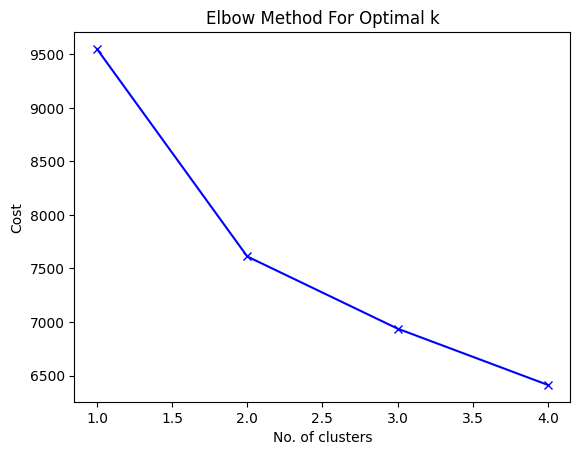

In [68]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X2)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [83]:
, cluster
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X2)
X2['cluster']= clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 433, cost: 7309.0
Run 1, iteration: 2/100, moves: 3, cost: 7309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 971, cost: 6897.0
Run 2, iteration: 2/100, moves: 45, cost: 6897.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 193, cost: 7780.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8453.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 458, cost: 7605.0
Best run was number 2


In [86]:
X2['cluster'].value_counts()

2    1402
0    1267
1    1014
Name: cluster, dtype: int64

In [43]:
## prepare data

X = df.drop(['Salary', 'Salary Currency','Salary in USD','Salary Category'], axis=1)
y = df['Salary Category']

In [70]:
df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year,Salary Category,is_expatriate
0,Other,Full-Time,Senior,Expert,60000,Euro,Germany,64781,Germany,Large,2023,Less than $80000,No
1,Data Engineer,Full-Time,Mid,Intermediate,160000,United States Dollar,United States,160000,United States,Medium,2023,$160000 - $200000,No
2,Data Engineer,Full-Time,Mid,Intermediate,140000,United States Dollar,United States,140000,United States,Medium,2023,$120000 - $160000,No
3,Data Engineer,Full-Time,Mid,Intermediate,139152,United States Dollar,United States,139152,United States,Large,2023,$120000 - $160000,No
4,Data Engineer,Full-Time,Mid,Intermediate,82452,United States Dollar,United States,82452,United States,Large,2023,$80000 - $120000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020,More than $200000,No
3679,Other,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021,$120000 - $160000,No
3680,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020,$80000 - $120000,No
3681,Other,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020,$80000 - $120000,No


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Job Title           3683 non-null   object  
 1   Employment Type     3683 non-null   object  
 2   Experience Level    3683 non-null   object  
 3   Expertise Level     3683 non-null   object  
 4   Salary              3683 non-null   int64   
 5   Salary Currency     3683 non-null   object  
 6   Company Location    3683 non-null   object  
 7   Salary in USD       3683 non-null   int64   
 8   Employee Residence  3683 non-null   object  
 9   Company Size        3683 non-null   object  
 10  Year                3683 non-null   int64   
 11  Salary Category     3683 non-null   category
 12  is_expatriate       3683 non-null   object  
dtypes: category(1), int64(3), object(9)
memory usage: 349.2+ KB


In [77]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()
X3 = df.drop(['Salary', 'Salary Currency','Salary in USD','Salary Category'], axis=1)

# Iterate through each column in the DataFrame
for column in X3.columns:
    # Check if the column data type is object (categorical)
    if X3[column].dtype == 'object':
        # Apply label encoding to the categorical column
        X3[column] = label_encoder.fit_transform(X3[column])


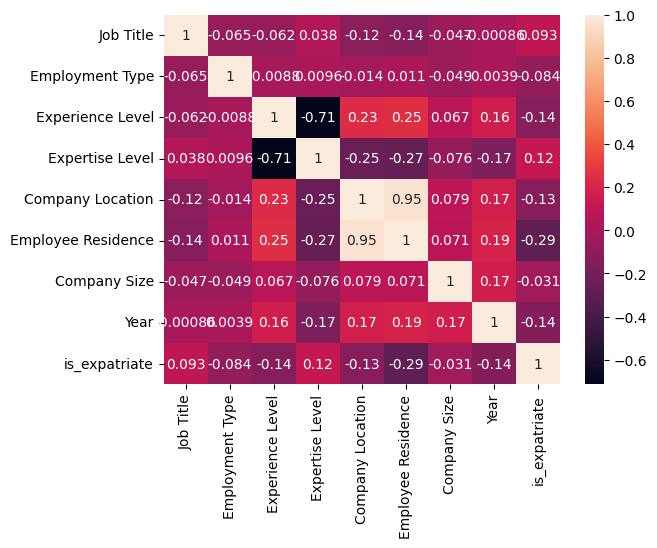

In [79]:
corr = X3.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

In [44]:
y

0        Less than $80000
1       $160000 - $200000
2       $120000 - $160000
3       $120000 - $160000
4        $80000 - $120000
              ...        
3678    More than $200000
3679    $120000 - $160000
3680     $80000 - $120000
3681     $80000 - $120000
3682     $80000 - $120000
Name: Salary Category, Length: 3683, dtype: category
Categories (5, object): ['Less than $80000' < '$80000 - $120000' < '$120000 - $160000' <
                         '$160000 - $200000' < 'More than $200000']

In [45]:
X

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Employee Residence,Company Size,Year,is_expatriate
0,Other,Full-Time,Senior,Expert,Germany,Germany,Large,2023,No
1,Data Engineer,Full-Time,Mid,Intermediate,United States,United States,Medium,2023,No
2,Data Engineer,Full-Time,Mid,Intermediate,United States,United States,Medium,2023,No
3,Data Engineer,Full-Time,Mid,Intermediate,United States,United States,Large,2023,No
4,Data Engineer,Full-Time,Mid,Intermediate,United States,United States,Large,2023,No
...,...,...,...,...,...,...,...,...,...
3678,Data Scientist,Full-Time,Senior,Expert,United States,United States,Large,2020,No
3679,Other,Full-Time,Mid,Intermediate,United States,United States,Large,2021,No
3680,Data Scientist,Full-Time,Entry,Junior,United States,United States,Small,2020,No
3681,Other,Contract,Entry,Junior,United States,United States,Large,2020,No


In [46]:
y.value_counts()

$120000 - $160000    872
$80000 - $120000     748
More than $200000    725
Less than $80000     702
$160000 - $200000    636
Name: Salary Category, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder



label_mapping = {
    'Less than $80000': 1,
    '$80000 - $120000': 2,
    '$120000 - $160000': 3,
    '$160000 - $200000': 4,
    'More than $200000': 5
}

# Map labels to numeric values using the mapping dictionary
y= y.map(label_mapping)

# Print the encoded values
print("Encoded values:", y)

Encoded values: 0       1
1       4
2       3
3       3
4       2
       ..
3678    5
3679    3
3680    2
3681    2
3682    2
Name: Salary Category, Length: 3683, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [48]:
X2 = X.copy()
X = pd.get_dummies(X)

In [49]:
from sklearn.model_selection import cross_val_score, train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# scale data

In [50]:
X_train

,Year,Job Title_Analytics Engineer,Job Title_Applied Scientist,Job Title_Data Analyst,Job Title_Data Architect,Job Title_Data Engineer,Job Title_Data Science Manager,Job Title_Data Scientist,Job Title_ML Engineer,Job Title_Machine Learning Engineer,...,Employee Residence_India,Employee Residence_Other,Employee Residence_Spain,Employee Residence_United Kingdom,Employee Residence_United States,Company Size_Large,Company Size_Medium,Company Size_Small,is_expatriate_No,is_expatriate_Yes
2158,2023,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1559,2023,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1078,2023,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1659,2023,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
600,2023,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2022,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
905,2023,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1096,2023,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
235,2023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [51]:
###Libraries for Modedl Fitting

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [52]:
### Function For ROC Curve
#Inputs are y_test and y_prob
#Make sure to calculate y_prob in each model before generating ROC curve

def plot_ROC(y_test, y_prob):
    from sklearn import metrics
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    sns.set_theme(style = 'white')
    plt.figure(figsize = (3, 3))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [53]:
### Function For Confusion matrix

def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show(block=True)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[89 27 15  2  2]
 [49 52 46  8  7]
 [24 50 54 21 20]
 [11 33 57 14 19]
 [ 9 34 52 18 24]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.49      0.66      0.56       135
           2       0.27      0.32      0.29       162
           3       0.24      0.32      0.27       169
           4       0.22      0.10      0.14       134
           5       0.33      0.18      0.23       137

    accuracy                           0.32       737
   macro avg       0.31      0.32      0.30       737
weighted avg       0.31      0.32      0.30       737



In [55]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[ 99   4  31   0   1]
 [ 36  12 107   0   7]
 [ 17   4 121   0  27]
 [  6   5  95   0  28]
 [  6   4  82   0  45]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.60      0.73      0.66       135
           2       0.41      0.07      0.13       162
           3       0.28      0.72      0.40       169
           4       0.00      0.00      0.00       134
           5       0.42      0.33      0.37       137

    accuracy                           0.38       737
   macro avg       0.34      0.37      0.31       737
weighted avg       0.34      0.38      0.31       737



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(43))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = rf.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
30,Company Location_United States,0.143158
37,Employee Residence_United States,0.140339
34,Employee Residence_Other,0.097370
27,Company Location_Other,0.096960
22,Expertise Level_Expert,0.077150
20,Experience Level_Senior,0.050762
17,Experience Level_Entry,0.034481
19,Experience Level_Mid,0.033152
24,Expertise Level_Junior,0.032670
3,Job Title_Data Analyst,0.026389


In [64]:
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter distributions for hyperparameter tuning
param_distributions = {
    'n_estimators': np.arange(10, 200, 10),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(5, 30, 5)),  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters:  {'n_estimators': 120, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [87]:
# Create a new instance of RandomForestClassifier with the best hyperparameter values
best_rf = RandomForestClassifier(random_state=42,
                                n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                max_features=best_params['max_features'])

# Fit the best_rf to the training data
best_rf.fit(X_train, y_train)

# Predict with the best_rf
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]

# Evaluate the performance of the tuned model
# Add your evaluation code here

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[96 13 22  0  4]
 [36 26 70  2 28]
 [13 14 73  3 66]
 [ 6  7 62  2 57]
 [ 6  5 40  5 81]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.61      0.71      0.66       135
           2       0.40      0.16      0.23       162
           3       0.27      0.43      0.33       169
           4       0.17      0.01      0.03       134
           5       0.34      0.59      0.43       137

    accuracy                           0.38       737
   macro avg       0.36      0.38      0.34       737
weighted avg       0.36      0.38      0.33       737



In [59]:

# Map your classes to start from 0
class_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
y_train_mapped = np.array([class_mapping[val] for val in y_train])
y_test_mapped = np.array([class_mapping[val] for val in y_test])

# Create and train the XGBoost Classifier
xgb = XGBClassifier(random_state=42, max_depth=5, eval_metric='mlogloss')
xgb.fit(X_train, y_train_mapped)

# Predictions
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_mapped, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_mapped, y_pred))



=== Confusion Matrix ===
[[90 18 19  0  8]
 [27 43 55  7 30]
 [ 9 29 56 11 64]
 [ 3 14 53  7 57]
 [ 4  9 35  9 80]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       135
           1       0.38      0.27      0.31       162
           2       0.26      0.33      0.29       169
           3       0.21      0.05      0.08       134
           4       0.33      0.58      0.43       137

    accuracy                           0.37       737
   macro avg       0.37      0.38      0.36       737
weighted avg       0.37      0.37      0.35       737



In [60]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
logistic_model = LR.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)
class_report=classification_report(y_test,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[96 16 22  0  1]
 [34 38 83  0  7]
 [14 24 98  0 33]
 [ 6 17 82  0 29]
 [ 6 10 73  0 48]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.62      0.71      0.66       135
           2       0.36      0.23      0.28       162
           3       0.27      0.58      0.37       169
           4       0.00      0.00      0.00       134
           5       0.41      0.35      0.38       137

    accuracy                           0.38       737
   macro avg       0.33      0.38      0.34       737
weighted avg       0.33      0.38      0.34       737



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [61]:
svc = SVC(random_state = 42, probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[  0   0 135   0   0]
 [  0   0 162   0   0]
 [  0   0 169   0   0]
 [  0   0 134   0   0]
 [  0   0 137   0   0]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       135
           2       0.00      0.00      0.00       162
           3       0.23      1.00      0.37       169
           4       0.00      0.00      0.00       134
           5       0.00      0.00      0.00       137

    accuracy                           0.23       737
   macro avg       0.05      0.20      0.07       737
weighted avg       0.05      0.23      0.09       737



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
